In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Machine Learning 100 days\Day_47_part_2_PCA\train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

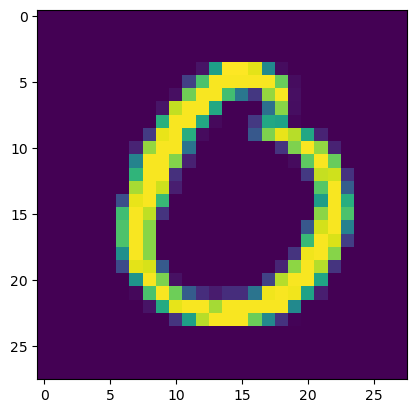

In [8]:
plt.imshow(df.iloc[40937,1:].values.reshape(28,28))

In [34]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train.shape

(33600, 784)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9648809523809524

# Now use PCA and check the accuracy

In [19]:
#Step-1 standardized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)   #how many columns we want

In [30]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [42]:
X_train_trf.shape

(33600, 100)

In [43]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(X_test_trf)

In [48]:
accuracy_score(Y_test,y_pred) #even with less columns we have almost same accuracy

0.9544047619047619

In [52]:
#Now check for all
for i in range(1,785):
    pca = PCA(n_components=i)
    
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,Y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(Y_test,y_pred))

0.2730952380952381
0.42214285714285715
0.48488095238095236
0.6194047619047619
0.7297619047619047
0.8188095238095238
0.866904761904762
0.8938095238095238
0.9075
0.9247619047619048
0.9315476190476191
0.9421428571428572
0.9492857142857143
0.954047619047619
0.9544047619047619
0.9583333333333334
0.9616666666666667
0.9626190476190476
0.9644047619047619
0.9654761904761905
0.9665476190476191


KeyboardInterrupt: 

In [54]:
pca.explained_variance_ #eigen values

array([335506.57620544, 244807.10511442, 212051.0345165 , 185066.15331643,
       168000.24596853, 148918.34905623, 112510.83340209,  99329.48444433,
        95140.26441454,  79978.97709016,  71872.98931731,  70295.41855281,
        58642.17064567,  57797.84788158,  54416.08107528,  51094.27632925,
        45432.48090442,  44087.7557423 ,  40634.96784429,  39529.38503822,
        36946.57183798,  35169.451414  ])

In [56]:
pca.components_  #eigen vectors

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [58]:
pca.components_.shape

(22, 784)